In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

/home/rean/projects/venv/nn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


w[0]: 0.393906  b: -0.031804


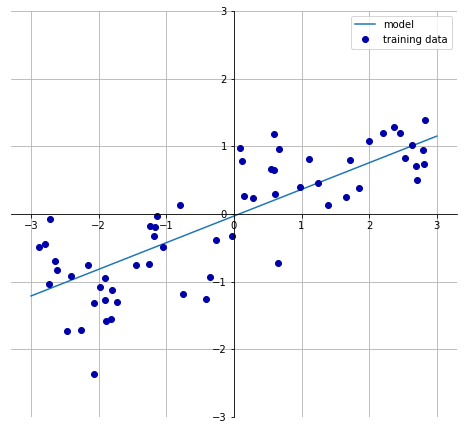

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [4]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [6]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [7]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


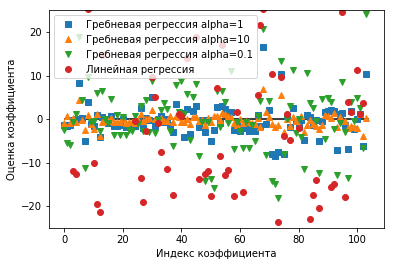

In [8]:
plt.plot(ridge.coef_, 's', label='Гребневая регрессия alpha=1')
plt.plot(ridge10.coef_, '^', label='Гребневая регрессия alpha=10')
plt.plot(ridge01.coef_, 'v', label='Гребневая регрессия alpha=0.1')
plt.plot(lr.coef_, 'o', label='Линейная регрессия')
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

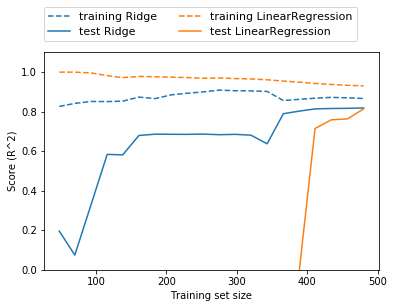

In [9]:
mglearn.plots.plot_ridge_n_samples()

In [10]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на тестовом наборе: 0.21
Количество использованных признаков: 4


In [11]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [12]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 94


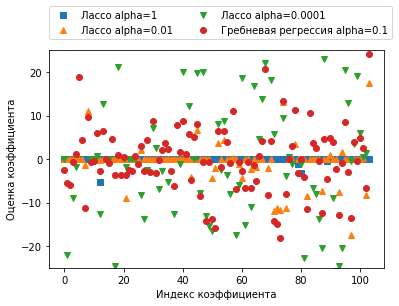

In [13]:
plt.plot(lasso.coef_, 's', label='Лассо alpha=1')
plt.plot(lasso001.coef_, '^', label='Лассо alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Лассо alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Гребневая регрессия alpha=0.1')
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

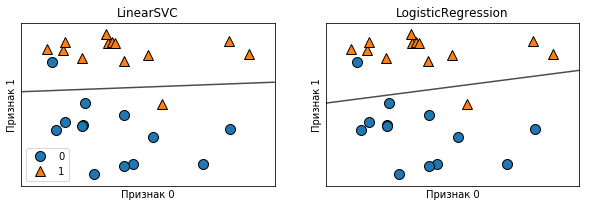

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
axes[0].legend()

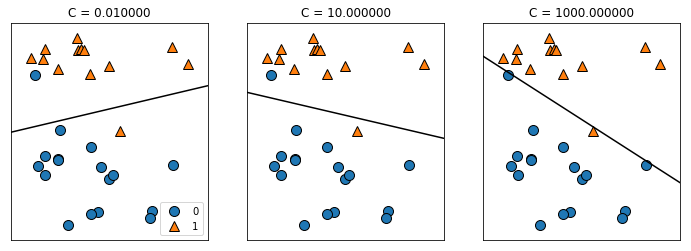

In [15]:
mglearn.plots.plot_linear_svc_regularization()

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                    random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.955
Правильность на тестовом наборе: 0.958


In [17]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.972
Правильность на тестовом наборе: 0.965


In [18]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


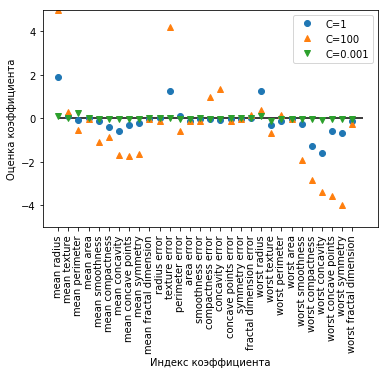

In [19]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.ylim(-5, 5)
plt.legend()

Правильность на обучении для логрегресии l1 с C=0.001: 0.91
Правильность на тесте для логрегресии l1 с C=0.001: 0.92
Правильность на обучении для логрегресии l1 с C=1.000: 0.96
Правильность на тесте для логрегресии l1 с C=1.000: 0.96
Правильность на обучении для логрегресии l1 с C=100.000: 0.99
Правильность на тесте для логрегресии l1 с C=100.000: 0.98


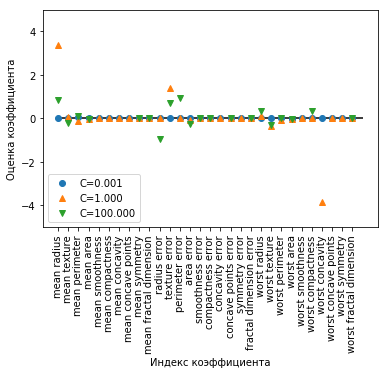

In [20]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Правильность на обучении для логрегресии l1 с C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Правильность на тесте для логрегресии l1 с C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))

    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Индекс коэффициента')
plt.ylabel('Оценка коэффициента')
plt.ylim(-5, 5)
plt.legend(loc=3)

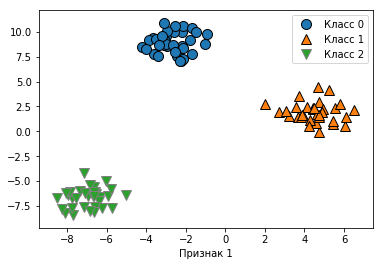

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.xlabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2'])

In [22]:
linear_svm = LinearSVC().fit(X, y)
print('Форма коэффициента: {}'.format(linear_svm.coef_.shape))
print('Форма константы: {}'.format(linear_svm.intercept_.shape))

Форма коэффициента: (3, 2)
Форма константы: (3,)


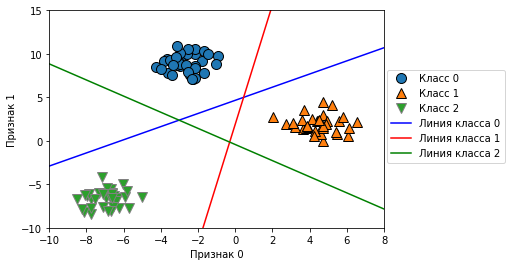

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))

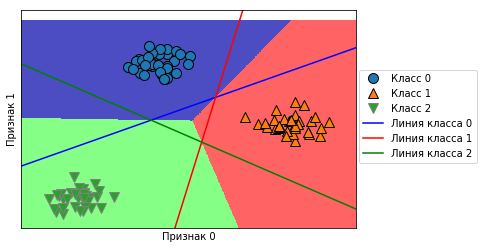

In [24]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))